### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [1]:
GROUP = "27"
NAME1 = "Chao Fang"
NAME2 = "Yuxuan Xia"

Make sure you can run the following cell without errors.

In [2]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets 6 hours of access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/tree/master/Instructions) to understand how to connect to this instance and use our tools there. You're free to use this resource as you see fit, but if you run out of hours you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-4) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 5-6, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources ;). However, sometimes that's because TensorFlow didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [2]:
# YOUR CODE HERE
# Data preprocessing
import os, cv2, re, random
import pandas as pd
from tqdm import *
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Packages for defining the architecture of our model
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation, regularizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

# One-hot encoding
from keras.utils import np_utils

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping, Callback, LearningRateScheduler

# Ploting
import matplotlib.pyplot as plt

# Ndarray computations
import numpy as np
import math
# Confusion matrix for assessment step
from sklearn.metrics import confusion_matrix

# Using VGG 16
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D




Using TensorFlow backend.


---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("Create project structure.ipynb"), starting from the original `all.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [4]:
# YOUR CODE HERE
train_size_percent = 0.8

**% Samples in the validation set:**

In [5]:
# YOUR CODE HERE
vad_size_percent = 0.2

Fill in the dataset paths (to be used later by your data generators):

In [3]:
# YOUR CODE HERE
small_train_path  = "./small_train"
small_val_path = "./small_val"
full_train_path  = "./train"
full_val_path = "./val"
test_path = "./test/"

---
Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [4]:
# YOUR CODE HERE
BATCH_SIZE = 32   # Batch size
NUM_EPOCHS = 20   #epochs
IMAGE_SIZE = (224, 224)


train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        small_train_path,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        small_val_path,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [8]:
# YOUR CODE HERE

# 3 conv layers with ReLU activation followed by max-pooling layers
def test_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3),data_format="channels_last",activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2 FC layers with dropout
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(32,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

model = test_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)             0         
__________

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [9]:
# YOUR CODE HERE
history=model.fit_generator(
        train_generator,
        steps_per_epoch=3500 // BATCH_SIZE,
        epochs=NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=1500 // BATCH_SIZE)

Epoch 1/20
109/109 [==============================] - 30s 272ms/step - loss: 0.7423 - acc: 0.5469 - val_loss: 0.6647 - val_acc: 0.5453
Epoch 2/20
109/109 [==============================] - 28s 257ms/step - loss: 0.6656 - acc: 0.6323 - val_loss: 0.5823 - val_acc: 0.7073
Epoch 3/20
109/109 [==============================] - 28s 258ms/step - loss: 0.5903 - acc: 0.6851 - val_loss: 0.6039 - val_acc: 0.6813
Epoch 4/20
109/109 [==============================] - 28s 254ms/step - loss: 0.5749 - acc: 0.6978 - val_loss: 0.5634 - val_acc: 0.7140
Epoch 5/20
109/109 [==============================] - 28s 253ms/step - loss: 0.5418 - acc: 0.7271 - val_loss: 0.5600 - val_acc: 0.7233
Epoch 6/20
109/109 [==============================] - 28s 257ms/step - loss: 0.5063 - acc: 0.7529 - val_loss: 0.5553 - val_acc: 0.7420
Epoch 7/20
109/109 [==============================] - 28s 255ms/step - loss: 0.4862 - acc: 0.7693 - val_loss: 0.5536 - val_acc: 0.7260
Epoch 8/20
109/109 [==============================] - 2

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


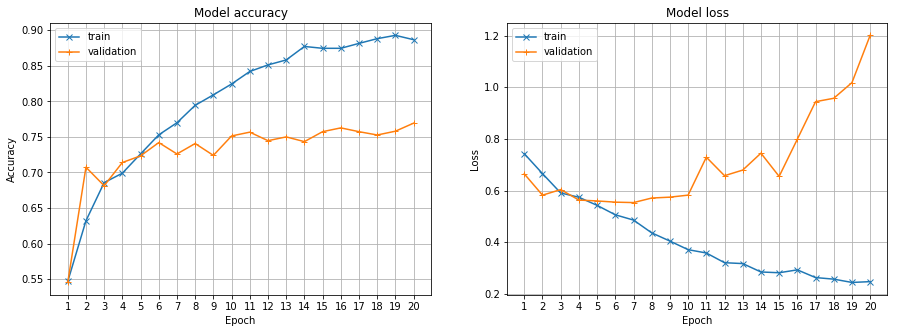

In [10]:
model.save('intial_model.h5')

# YOUR CODE HERE
print(history.history.keys())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), history.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), history.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), history.history['loss'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), history.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='upper left')

Based on these, what would you suggest for improving your model? Why?

**Your answer:** The results show that, after around 8 epochs, the validation accuracy stops increasing and the validation loss starts to increase (though the general trend is fluctuating). This means that the network stops learning useful information at (around) the 8th epoch and starts to adapt to irrelevent information, with respect to classification task, in the training data set, i.e., overfitting. In order to improve the model, one can use, e.g., weight regularization, more aggressive dropout, deeper networks or collect more data. 

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [11]:
# YOUR CODE HERE
def more_layers_model():
    
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = more_layers_model()

more_layers_history = model.fit_generator(
            train_generator,
            steps_per_epoch=3500 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=1500 // BATCH_SIZE)

def more_regularization_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3),data_format="channels_last",activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2 FC layers with dropout
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(32,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

model = more_regularization_model()

more_regularization_history = model.fit_generator(
            train_generator,
            steps_per_epoch=3500 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=1500 // BATCH_SIZE)

# def more_neurons_model():
    
#     model = Sequential()
    
#     model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(64, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
#     model.add(Dense(1024))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
    
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model


# model_names = ['more_layers_model', 'more_regularization_model']
# for name in model_names:
#     print('Training model:',name)
#     model = globals()[name]()
#     layer_history = model.fit_generator(
#             train_generator,
#             steps_per_epoch=3500 // BATCH_SIZE,
#             epochs=NUM_EPOCHS,
#             validation_data=validation_generator,     
#             validation_steps=1500 // BATCH_SIZE)
#     print('Done!')

Epoch 1/20
109/109 [==============================] - 29s 265ms/step - loss: 0.6940 - acc: 0.4959 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 2/20
109/109 [==============================] - 28s 256ms/step - loss: 0.6848 - acc: 0.5678 - val_loss: 0.6632 - val_acc: 0.5607
Epoch 3/20
109/109 [==============================] - 28s 255ms/step - loss: 0.6541 - acc: 0.6202 - val_loss: 0.6650 - val_acc: 0.5967
Epoch 4/20
109/109 [==============================] - 27s 251ms/step - loss: 0.6374 - acc: 0.6348 - val_loss: 0.6104 - val_acc: 0.7127
Epoch 5/20
109/109 [==============================] - 28s 257ms/step - loss: 0.6139 - acc: 0.6769 - val_loss: 0.7053 - val_acc: 0.6120
Epoch 6/20
109/109 [==============================] - 28s 253ms/step - loss: 0.5907 - acc: 0.6911 - val_loss: 0.5548 - val_acc: 0.7360
Epoch 7/20
109/109 [==============================] - 27s 248ms/step - loss: 0.5475 - acc: 0.7343 - val_loss: 0.5292 - val_acc: 0.7347
Epoch 8/20
109/109 [==============================] - 2

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

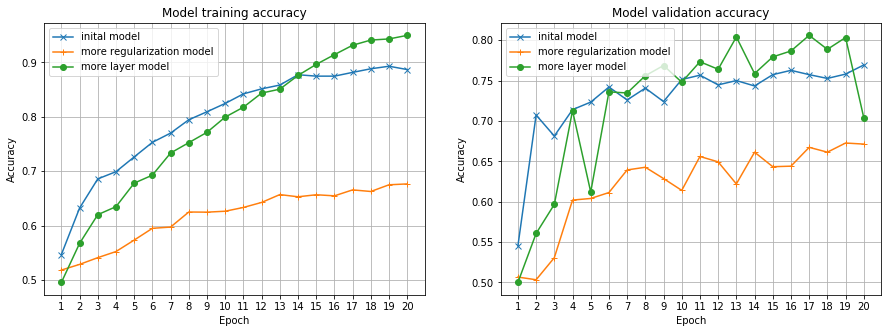

In [12]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), history.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), more_regularization_history.history['acc'], '-+')
axes[0].plot(range(1,NUM_EPOCHS+1), more_layers_history.history['acc'], '-o')
axes[0].set_title('Model training accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['inital model', 'more regularization model', 'more layer model'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), history.history['val_acc'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), more_regularization_history.history['val_acc'], '-+')
axes[1].plot(range(1,NUM_EPOCHS+1), more_layers_history.history['val_acc'], '-o')
axes[1].set_title('Model validation accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['inital model', 'more regularization model', 'more layer model'], loc='upper left')

Did your results improve? Explain why, or why not.

**Your answer:** According to the conclusion we drew in last task, we first chose to add L2 norm regularization to convolutional layer to further reduce overfitting (dropout has already been added to fully connected layer). However, compared to the inital model we have, the new model obtained has even worse performance. We suspect that this is because the regularization parameter we chose is a little bit too large. We also tried smaller values, i.e., 0.001, however, the results still did not improve. Perhaps, fine tuning the regularization parameter for each convolutional layer is needed to further improve the results. 

We also tried another alternative, i.e., making the network deeper. The results show that 'more layers model' gives the best performance in terms of the training and validation accuracy, though the new network converges more slowly than the original one. Because we implement the drop-out method in all models to reduce overfitting, adding more layers help to increase the potential model capacity and to extract more features. However, there is a limit after which adding more layers might increase overfitting.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to ping-pong, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [14]:
# YOUR CODE HERE

def more_layers_model():
    
# This model contains 1 input conv layer, 5 conv layers + max pooling, 1 FC layer and 1 output layer    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

my_model = more_layers_model()
history_bm=my_model.fit_generator(
           train_generator,
           steps_per_epoch=3500 // BATCH_SIZE,
           epochs=NUM_EPOCHS,
           validation_data=validation_generator,
           validation_steps=1500 // BATCH_SIZE)

Epoch 1/20
109/109 [==============================] - 27s 252ms/step - loss: 0.6971 - acc: 0.5236 - val_loss: 0.6912 - val_acc: 0.4993
Epoch 2/20
109/109 [==============================] - 28s 254ms/step - loss: 0.6892 - acc: 0.5536 - val_loss: 0.6727 - val_acc: 0.6073
Epoch 3/20
109/109 [==============================] - 27s 250ms/step - loss: 0.6608 - acc: 0.6137 - val_loss: 0.6708 - val_acc: 0.5913
Epoch 4/20
109/109 [==============================] - 28s 255ms/step - loss: 0.6435 - acc: 0.6364 - val_loss: 0.6285 - val_acc: 0.6553
Epoch 5/20
109/109 [==============================] - 28s 254ms/step - loss: 0.6237 - acc: 0.6620 - val_loss: 0.6246 - val_acc: 0.6727
Epoch 6/20
109/109 [==============================] - 27s 245ms/step - loss: 0.5895 - acc: 0.6970 - val_loss: 0.6044 - val_acc: 0.6893
Epoch 7/20
109/109 [==============================] - 27s 248ms/step - loss: 0.5884 - acc: 0.7147 - val_loss: 0.5815 - val_acc: 0.7167
Epoch 8/20
109/109 [==============================] - 2

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


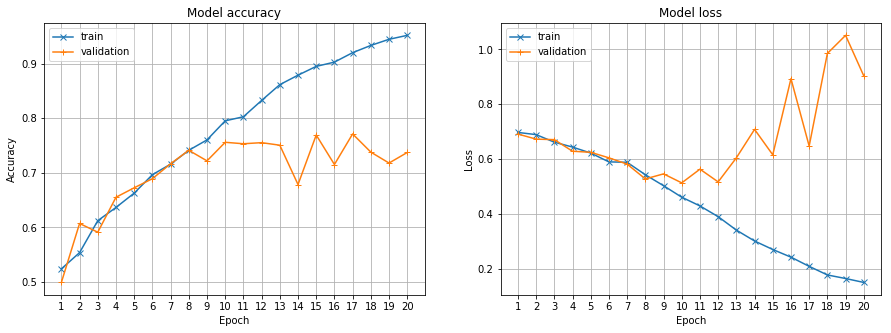

In [15]:
# YOUR CODE HERE
print(history_bm.history.keys())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), history_bm.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), history_bm.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), history_bm.history['loss'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), history_bm.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='upper left')

[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your ping-pong submission.

In [16]:
my_model.save('my_model.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [17]:
# Load VGG16 without top
vgg_model = VGG16(weights='imagenet', include_top=False,
                  input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1],3))

Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [18]:
# YOUR CODE HERE

x = vgg_model.output 
# Flatten layer
x = Flatten()(x)
x = Dense(1024, kernel_initializer='random_uniform', bias_initializer='random_uniform', activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)



Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [27]:
# YOUR CODE HERE
# transfer learning model
model = Model(inputs=vgg_model.input, outputs=preds)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [39]:
# YOUR CODE HERE
for layer in model.layers[:-4]:
    layer.trainable = False  

Create the callbacks (if any) you would like to use, compile the model and train it.

In [40]:
# YOUR CODE HERE
opt = optimizers.SGD(lr=1e-3, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', 
	             optimizer=opt, metrics=['accuracy'])
print('Training model')
tl_history= model.fit_generator(
            train_generator,
            steps_per_epoch=3500 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=1500 // BATCH_SIZE)
print('Done!')

Training model
Epoch 1/20
109/109 [==============================] - 48s 443ms/step - loss: 0.2092 - acc: 0.9139 - val_loss: 0.2173 - val_acc: 0.9080
Epoch 2/20
109/109 [==============================] - 47s 429ms/step - loss: 0.1948 - acc: 0.9237 - val_loss: 0.2225 - val_acc: 0.9147
Epoch 3/20
109/109 [==============================] - 47s 428ms/step - loss: 0.1931 - acc: 0.9215 - val_loss: 0.2054 - val_acc: 0.9133
Epoch 4/20
109/109 [==============================] - 47s 430ms/step - loss: 0.1976 - acc: 0.9149 - val_loss: 0.3183 - val_acc: 0.8633
Epoch 5/20
109/109 [==============================] - 47s 428ms/step - loss: 0.1839 - acc: 0.9228 - val_loss: 0.2992 - val_acc: 0.8700
Epoch 6/20
109/109 [==============================] - 47s 428ms/step - loss: 0.1878 - acc: 0.9224 - val_loss: 0.2877 - val_acc: 0.8680
Epoch 7/20
109/109 [==============================] - 47s 429ms/step - loss: 0.1546 - acc: 0.9409 - val_loss: 0.2399 - val_acc: 0.8973
Epoch 8/20
109/109 [====================

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


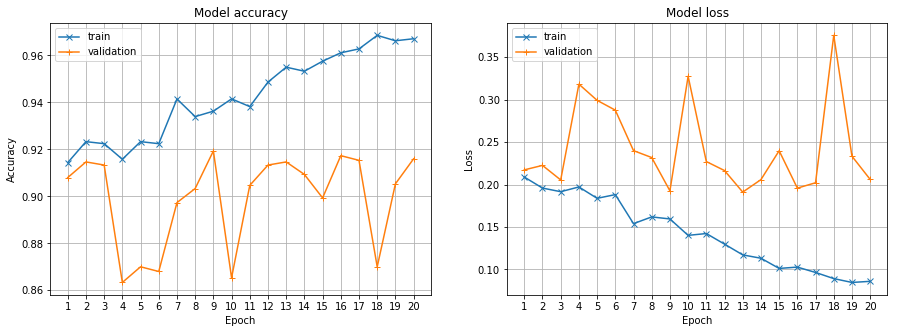

In [41]:
# YOUR CODE HERE
print(tl_history.history.keys())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), tl_history.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), tl_history.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), tl_history.history['loss'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), tl_history.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='best')

How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

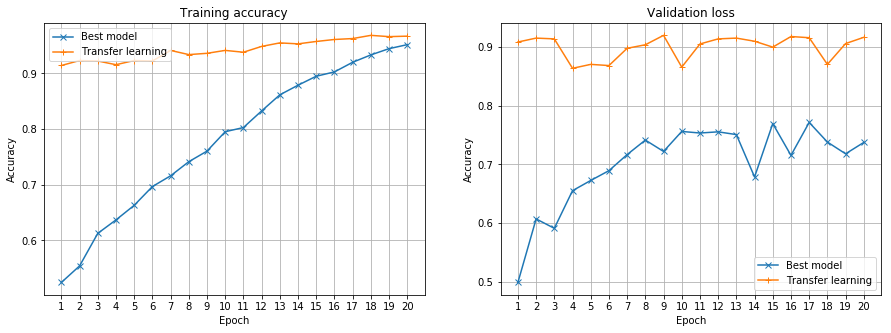

In [42]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), history_bm.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), tl_history.history['acc'], '-+')
axes[0].set_title('Training accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['Best model', 'Transfer learning'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), history_bm.history['val_acc'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), tl_history.history['val_acc'], '-+')
axes[1].set_title('Validation loss')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['Best model', 'Transfer learning'], loc='best')

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** The approach with transfer learning worked best. This can be verified from the fact that both training accuracy and validation accuracy of the model using transfer learning is higher than those of the model starting from scratch. Also, we can see that, in the plot showing the validation loss, the approach using transfer learning exhibited less fluctuation regarding model loss; this suggests that it is more robust to overfitting.

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** 1. The ImageNet contains many many more data (images); 2. The ImageNet contains many more image classes rather than only dog and cat. 

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** 1. The dog and cat are two classification categories that are also included in ImageNet. Therefore, we could use the relevent knowledge from the trained model using VGG and ImageNet to do the classification tasks in Dogs vs. Cats dataset; 2. With transfer learning, one can build a solid network architecture with comparatively little training data because the model is already pre-trained; 3. Save training time since, tycpically, one needs to only re-train the top layer(s). 

In which scenario would transfer learning be unsuitable?

**Your answer:** When we have very little training data for the specific task we are interested in; and the data set used in this task has very different features compared to the one, based on which, we do transfer learning.

Save the model to a HDF5 file.

In [43]:
model.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [44]:
#from keras.models import load_model
#model = load_model('trans_learning_top_only.h5')

# YOUR CODE HERE
# The first few layers, usually, will be detecting edges and blobs; they can be freezed to save training time. 
# Because the classification task in the dog&cat dataset is included in the ImageNet, in which sense, these two datasets are, to some extent, similar.
FREEZE_LAYERS = 3  # freeze the first few layers
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True  

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [45]:
# YOUR CODE HERE
opt = optimizers.SGD(lr=1e-5, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', 
	             optimizer=opt, metrics=['accuracy'])
print('Training model')
ft_history=model.fit_generator(
            train_generator,
            steps_per_epoch=3500 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=1500 // BATCH_SIZE)
print('Done!')

Training model
Epoch 1/20
109/109 [==============================] - 96s 883ms/step - loss: 0.0610 - acc: 0.9782 - val_loss: 0.1767 - val_acc: 0.9280
Epoch 2/20
109/109 [==============================] - 89s 819ms/step - loss: 0.0485 - acc: 0.9848 - val_loss: 0.1704 - val_acc: 0.9273
Epoch 3/20
109/109 [==============================] - 89s 816ms/step - loss: 0.0399 - acc: 0.9882 - val_loss: 0.1706 - val_acc: 0.9333
Epoch 4/20
109/109 [==============================] - 89s 817ms/step - loss: 0.0400 - acc: 0.9880 - val_loss: 0.1693 - val_acc: 0.9320
Epoch 5/20
109/109 [==============================] - 89s 818ms/step - loss: 0.0328 - acc: 0.9911 - val_loss: 0.1673 - val_acc: 0.9340
Epoch 6/20
109/109 [==============================] - 89s 817ms/step - loss: 0.0315 - acc: 0.9920 - val_loss: 0.1650 - val_acc: 0.9340
Epoch 7/20
109/109 [==============================] - 89s 817ms/step - loss: 0.0321 - acc: 0.9914 - val_loss: 0.1663 - val_acc: 0.9340
Epoch 8/20
109/109 [====================

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

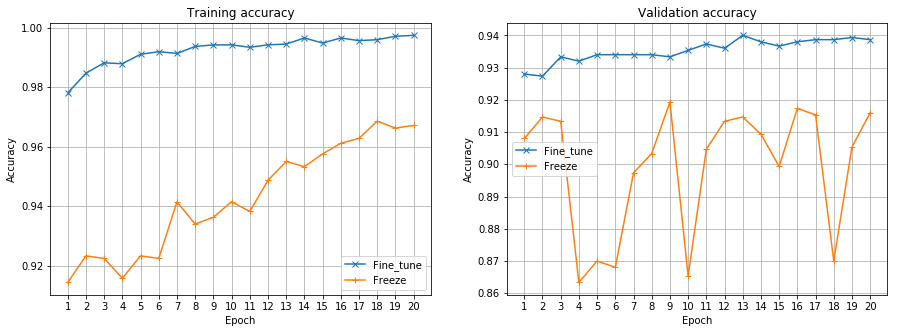

In [54]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# summarize history for accuracy
axes[0].plot(range(1,NUM_EPOCHS+1), ft_history.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), tl_history.history['acc'], '-+')
axes[0].set_title('Training accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['Fine_tune','Freeze'], loc='best')

# summarize history for loss
axes[1].plot(range(1,NUM_EPOCHS+1), ft_history.history['val_acc'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), tl_history.history['val_acc'], '-+')
axes[1].set_title('Validation accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['Fine_tune','Freeze'], loc='best')

Did the model's performance improve? Why (why not)?

**Your answer:** The model's performance improved when trained with entrie layers. The original VGG16 model is trained to do a much more complex multi-task classification problem. Because our objective is just to classify whether the image is dog or cat, unfreezing the hidden layers allows the already learned parameters to be further adapted, in a manner that, the network focuses on a much smaller objective (Dog or Cat). This explains the performance improvement.

Save the model to a HDF5 file.

In [47]:
model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [48]:
# We trained the network on another computer using only .py file; thus, only the model summary is provided
model = load_model('trans_learning_improved.h5')

model.summary()

def step_decay(epoch):
# drop the learning rate by half every epochs_drop epochs.
	initial_lrate = 0.0001
	drop = 0.5
	epochs_drop = 4.0
	lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
	return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))
       print('lr:', step_decay(len(self.losses)))

FREEZE_LAYERS = 3  # freeze the first few layers
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True        

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
opt = optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', 
	             optimizer=opt, metrics=['accuracy'])

#tb = TensorBoard(log_dir='./TF/2moreconv')
es = EarlyStopping(monitor='val_loss', patience=4)
       
print(model.summary())

#Create callback list
callbacks_list = [loss_history, lrate,es]
print('Training model')
im_history=model.fit_generator(
            train_generator,
            steps_per_epoch=3500 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=1500 // BATCH_SIZE,
            callbacks=callbacks_list)
print('Done!')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

109/109 [==============================] - 88s 809ms/step - loss: 0.0160 - acc: 0.9968 - val_loss: 0.0885 - val_acc: 0.9667
lr: 2.5e-05
Epoch 8/20
109/109 [==============================] - 88s 809ms/step - loss: 0.0134 - acc: 0.9986 - val_loss: 0.0901 - val_acc: 0.9640
lr: 2.5e-05
Epoch 9/20
109/109 [==============================] - 88s 806ms/step - loss: 0.0129 - acc: 0.9989 - val_loss: 0.0939 - val_acc: 0.9640
lr: 2.5e-05
Done!


How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

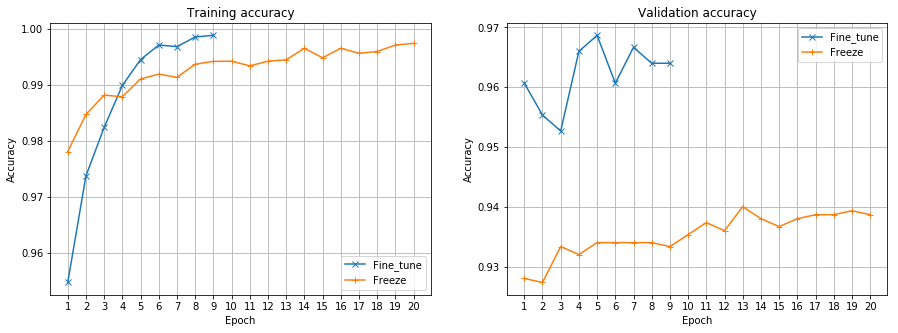

In [52]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# summarize history for accuracy
axes[0].plot(range(1,10), im_history.history['acc'], '-x')
axes[0].plot(range(1,NUM_EPOCHS+1), ft_history.history['acc'], '-+')
axes[0].set_title('Training accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,NUM_EPOCHS+1))
axes[0].grid(linestyle='-')
axes[0].legend(['Fine_tune','Freeze'], loc='best')

# summarize history for loss
axes[1].plot(range(1,10), im_history.history['val_acc'], '-x')
axes[1].plot(range(1,NUM_EPOCHS+1), ft_history.history['val_acc'], '-+')
axes[1].set_title('Validation accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,NUM_EPOCHS+1))
axes[1].grid(linestyle='-')
axes[1].legend(['Fine_tune','Freeze'], loc='best')

Save the model to a HDF5 file.

In [53]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [4]:
# YOUR CODE HERE
final_model = load_model('best_trans_learning.h5')

train_generator = train_datagen.flow_from_directory(
                    full_train_path,
                    target_size=IMAGE_SIZE,
                    batch_size=BATCH_SIZE,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        full_val_path,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised ;).

In [6]:
# YOUR CODE HERE
def step_decay(epoch):
# drop the learning rate by half every epochs_drop epochs.
	initial_lrate = 0.0001
	drop = 0.5
	epochs_drop = 4.0
	lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
	return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))
       print('lr:', step_decay(len(self.losses)))

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
opt = optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
final_model.compile(loss='binary_crossentropy', 
	             optimizer=opt, metrics=['accuracy'])

#tb = TensorBoard(log_dir='./TF/2moreconv')
es = EarlyStopping(monitor='val_loss', patience=4)
       
print(final_model.summary())

#Create callback list
callbacks_list = [loss_history, lrate,es]
print('Training model')
final_history=final_model.fit_generator(
            train_generator,
            steps_per_epoch=20000 // BATCH_SIZE,
            epochs=NUM_EPOCHS,
            validation_data=validation_generator,     
            validation_steps=5000 // BATCH_SIZE,
            callbacks=callbacks_list)
print('Done!')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

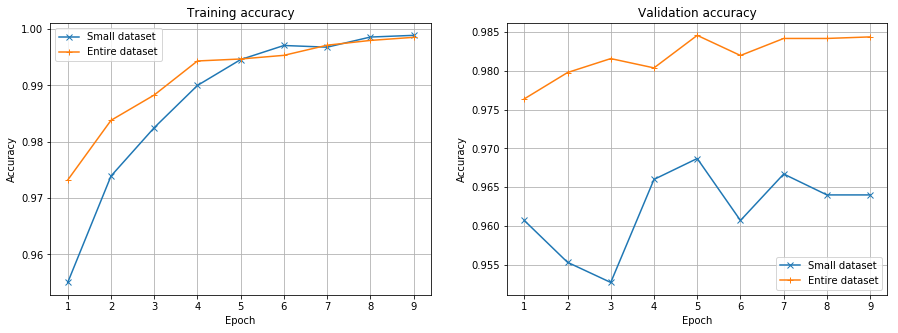

In [10]:
final_model.save('full_data_learning.h5')

# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# summarize history for accuracy
axes[0].plot(range(1,10), im_history.history['acc'], '-x')
axes[0].plot(range(1,10), final_history.history['acc'], '-+')
axes[0].set_title('Training accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(range(1,10))
axes[0].grid(linestyle='-')
axes[0].legend(['Small dataset','Entire dataset'], loc='best')

# summarize history for loss
axes[1].plot(range(1,10), im_history.history['val_acc'], '-x')
axes[1].plot(range(1,10), final_history.history['val_acc'], '-+')
axes[1].set_title('Validation accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(range(1,10))
axes[1].grid(linestyle='-')
axes[1].legend(['Small dataset','Entire dataset'], loc='best')

What can you conclude from these plots?

**Your answer:** If one wants to further improve the model’s performance, it is always a good idea to feed the network more training data, if possible;)

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [6]:
model = load_model('full_data_learning.h5')

def get_image(index):
    img = cv2.imread('./test/%d.jpg' % index)
    img = cv2.resize(img, IMAGE_SIZE)
    img.astype(np.float32)
    img = img / 255.0
    return img

test_num = 12500
image_matrix = np.zeros((test_num, IMAGE_SIZE[0], IMAGE_SIZE[1], 3), dtype=np.float32)

for i in tqdm(range(test_num)):
    image_matrix[i] = get_image(i+1)

preds = model.predict(image_matrix, verbose=1)

s = 'id,label\n'
for i, p in enumerate(preds):
    s += '%d,%f\n' % (i+1, p)

with open('DogvsCat.csv', 'w') as f:
    f.write(s)  

100%|██████████| 12500/12500 [00:49<00:00, 254.77it/s]


12500/12500 [==============================] - 130s 10ms/step


Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** 0.16196

What was the username you used for this submission?

**Your answer:** Yuxuan Xia